# Project 2: Ames Housing Data and Kaggle Challenge

## Problem Statement: 

## Executive Summary: 


## Contents: 
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
    - [Handling Null Values](#Handling-Null-Values)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Visualization Notes](#Visualization-Notes)
    - [Dropping Outliers](#Dropping-Outliers)
- [Converting Categorical Data](#Converting-Categorical-Data)
- [Preprocessing and Modeling](#Preprocessing-and-Modeling)
    - [Linear Regression](#Linear-Regression)
    - [Adjusted Linear Regression](#Adjusted-Linear-Regression)
    - [Linear Regression Comparison Notes](#Comparison-Notes)
- [Regularization](#Regularization)
    - [Scaling Data](#Scaling-Data)
    - [Lasso Regression](#Lasso-Regression)
    - [Ridge Regression](#Ridge-Regression)
- [Model Scoring](#Model-Scoring)
    - [Linear Regression Scoring](#Linear-Regression-Scoring)
    - [Lasso Regression Scoring](#Lasso-Regression-Scoring)
    - [Ridge Regression Scoring](#Ridge-Regression-Scoring)
- [Conclusion](#Conclusion)
    - [Prediction and Evaluation](#Prediction-and-Evaluation)
    - [Kaggle Predictions](#Kaggle-Predictions)


## Data Import and Cleaning

In [1]:
# Imports
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm

#### 1. Read in data

In [2]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

#### 2. Data observations

In [3]:
train.shape

(2051, 81)

In [4]:
test.shape

(878, 80)

In [5]:
# See what the different column is between the two datasets
set(train) - set(test)

{'SalePrice'}

In [6]:
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [7]:
train.set_index('Id', inplace = True)

In [8]:
test.set_index('Id', inplace = True)

In [9]:
# Check for null values 
train.isna().sum()[train.isna().sum() > 0].sort_values(ascending = False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Total Bsmt SF        1
dtype: int64

In [10]:
test.isna().sum()[test.isna().sum() > 0].sort_values(ascending = False)

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Fireplace Qu      422
Lot Frontage      160
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Garage Type        44
BsmtFin Type 2     25
BsmtFin Type 1     25
Bsmt Exposure      25
Bsmt Cond          25
Bsmt Qual          25
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
dtype: int64

---
According to `train.shape` we should get 2,051 values for each column. Here we get the columns with missing values and the number of missing values in each respective column. 

#### 3. Fix any errors

Note: Missing values are dealt with based on the data type and information given by the data description. 

In [11]:
# Check what type of data values are entered i.e. integers, strings, etc. 
train['Pool QC'].value_counts() 

Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64

In [12]:
# Based on data dictionary, fill in nan values with appropriate value
train['Pool QC'] = train['Pool QC'].replace({np.nan: 'No pool'})
test['Pool QC'] = test['Pool QC'].replace({np.nan: 'No pool'})

In [13]:
train['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

In [14]:
train['Misc Feature'] = train['Misc Feature'].replace({np.nan: 'No misc. features'})
test['Misc Feature'] = test['Misc Feature'].replace({np.nan: 'No misc. features'})

In [15]:
train['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [16]:
train['Alley'] = train['Alley'].replace({np.nan: 'No alley'})
test['Alley'] = test['Alley'].replace({np.nan: 'No alley'})

In [17]:
train['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [18]:
train['Fence'] = train['Fence'].replace({np.nan: 'No fence'})
test['Fence'] = test['Fence'].replace({np.nan: 'No fence'})

In [19]:
train['Fireplace Qu'].value_counts()

Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: Fireplace Qu, dtype: int64

In [20]:
train['Fireplace Qu'] = train['Fireplace Qu'].replace({np.nan: 'No fireplace'})
test['Fireplace Qu'] = test['Fireplace Qu'].replace({np.nan: 'No fireplace'})

In [21]:
train['Lot Frontage'].value_counts()

60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
        ... 
22.0       1
155.0      1
153.0      1
119.0      1
135.0      1
Name: Lot Frontage, Length: 118, dtype: int64

In [22]:
train['Lot Frontage'] = train['Lot Frontage'].fillna(0.0)
test['Lot Frontage'] = test['Lot Frontage'].fillna(0.0)

In [23]:
train['Garage Finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

In [24]:
train['Garage Finish'] = train['Garage Finish'].replace({np.nan: 'No garage'})
test['Garage Finish'] = test['Garage Finish'].replace({np.nan: 'No garage'})

In [25]:
train['Garage Cond'].value_counts()

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [26]:
train['Garage Cond'] = train['Garage Cond'].replace({np.nan: 'No garage'})
test['Garage Cond'] = test['Garage Cond'].replace({np.nan: 'No garage'})

In [27]:
train['Garage Qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [28]:
train['Garage Qual'] = train['Garage Qual'].replace({np.nan: 'No garage'})
test['Garage Qual'] = test['Garage Qual'].replace({np.nan: 'No garage'})

In [29]:
train['Garage Yr Blt'].value_counts()

2005.0    105
2007.0     84
2006.0     80
2004.0     72
2003.0     66
         ... 
1917.0      1
1919.0      1
1896.0      1
1895.0      1
1918.0      1
Name: Garage Yr Blt, Length: 100, dtype: int64

In [30]:
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna(0.0)
test['Garage Yr Blt'] = test['Garage Yr Blt'].fillna(0.0)

In [31]:
train['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [32]:
train['Garage Type'] = train['Garage Type'].replace({np.nan: 'No garage'})
test['Garage Type'] = test['Garage Type'].replace({np.nan: 'No garage'})

In [33]:
train['Bsmt Exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

In [34]:
train['Bsmt Exposure'] = train['Bsmt Exposure'].replace({np.nan: 'No basement'})
test['Bsmt Exposure'] = test['Bsmt Exposure'].replace({np.nan: 'No basement'})

In [35]:
train['BsmtFin Type 2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [36]:
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].replace({np.nan: 'No basement'})
test['BsmtFin Type 2'] = test['BsmtFin Type 2'].replace({np.nan: 'No basement'})

In [37]:
train['BsmtFin Type 1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

In [38]:
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].replace({np.nan: 'No basement'})
test['BsmtFin Type 1'] = test['BsmtFin Type 1'].replace({np.nan: 'No basement'})

In [39]:
train['Bsmt Cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [40]:
train['Bsmt Cond'] = train['Bsmt Cond'].replace({np.nan: 'No basement'})
test['Bsmt Cond'] = test['Bsmt Cond'].replace({np.nan: 'No basement'})

In [41]:
train['Bsmt Qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

In [42]:
train['Bsmt Qual'] = train['Bsmt Qual'].replace({np.nan: 'No basement'})
test['Bsmt Qual'] = test['Bsmt Qual'].replace({np.nan: 'No basement'})

In [43]:
train['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [44]:
train['Mas Vnr Type'] = train['Mas Vnr Type'].replace({np.nan: 'No masonry'})
test['Mas Vnr Type'] = test['Mas Vnr Type'].replace({np.nan: 'No masonry'})

In [45]:
train['Mas Vnr Area'].value_counts()

0.0      1216
120.0      11
176.0      10
200.0      10
180.0       9
         ... 
57.0        1
572.0       1
65.0        1
567.0       1
161.0       1
Name: Mas Vnr Area, Length: 373, dtype: int64

In [46]:
train['Mas Vnr Area'] = train['Mas Vnr Area'].fillna(0.0)
test['Mas Vnr Area'] = test['Mas Vnr Area'].fillna(0.0)

In [47]:
train['Bsmt Half Bath'].value_counts()

0.0    1923
1.0     122
2.0       4
Name: Bsmt Half Bath, dtype: int64

In [48]:
train['Bsmt Half Bath'] = train['Bsmt Half Bath'].fillna(0.0)
test['Bsmt Half Bath'] = test['Bsmt Half Bath'].fillna(0.0)

In [49]:
train['Bsmt Full Bath'].value_counts()

0.0    1200
1.0     824
2.0      23
3.0       2
Name: Bsmt Full Bath, dtype: int64

In [50]:
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].fillna(0.0)
test['Bsmt Full Bath'] = test['Bsmt Full Bath'].fillna(0.0)

In [51]:
train['Garage Cars'].value_counts()

2.0    1136
1.0     524
3.0     263
0.0     113
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [52]:
train['Garage Cars'] = train['Garage Cars'].fillna(0.0)
test['Garage Cars'] = test['Garage Cars'].fillna(0.0)

In [53]:
train['Garage Area'].value_counts()

0.0       113
440.0      70
576.0      69
484.0      52
528.0      46
         ... 
406.0       1
309.0       1
580.0       1
1184.0      1
557.0       1
Name: Garage Area, Length: 514, dtype: int64

In [54]:
train['Garage Area'] = train['Garage Area'].fillna(0.0)
test['Garage Area'] = test['Garage Area'].fillna(0.0)

In [55]:
train['Bsmt Unf SF'].value_counts()

0.0       165
384.0      14
672.0      11
728.0      10
816.0       9
         ... 
494.0       1
1323.0      1
1041.0      1
314.0       1
2062.0      1
Name: Bsmt Unf SF, Length: 967, dtype: int64

In [56]:
train['Bsmt Unf SF'] = train['Bsmt Unf SF'].fillna(0.0)
test['Bsmt Unf SF'] = test['Bsmt Unf SF'].fillna(0.0)

In [57]:
train['BsmtFin SF 2'].value_counts()

0.0      1803
294.0       5
162.0       3
539.0       3
72.0        3
         ... 
712.0       1
529.0       1
215.0       1
252.0       1
823.0       1
Name: BsmtFin SF 2, Length: 205, dtype: int64

In [58]:
train['BsmtFin SF 2'] = train['BsmtFin SF 2'].fillna(0.0)
test['BsmtFin SF 2'] = test['BsmtFin SF 2'].fillna(0.0)

In [59]:
train['Total Bsmt SF'].value_counts()

0.0       54
864.0     51
672.0     20
1040.0    20
816.0     17
          ..
842.0      1
752.0      1
1232.0     1
1480.0     1
1125.0     1
Name: Total Bsmt SF, Length: 892, dtype: int64

In [60]:
train['Total Bsmt SF'] = train['Total Bsmt SF'].fillna(0.0)
test['Total Bsmt SF'] = test['Total Bsmt SF'].fillna(0.0)

In [61]:
train['BsmtFin SF 1'].value_counts()

0.0      657
24.0      17
16.0      10
300.0      7
384.0      7
        ... 
848.0      1
70.0       1
688.0      1
472.0      1
661.0      1
Name: BsmtFin SF 1, Length: 821, dtype: int64

In [62]:
train['BsmtFin SF 1'] = train['BsmtFin SF 1'].fillna(0.0)
test['BsmtFin SF 1'] = test['BsmtFin SF 1'].fillna(0.0)

In [63]:
test['Electrical'].value_counts()

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [64]:
train['Electrical'] = train['Electrical'].replace({np.nan: 'No electricity'})
test['Electrical'] = test['Electrical'].replace({np.nan: 'No electricity'})

In [65]:
# Check to ensure there are no more missing values 
train.isna().sum()[train.isna().sum() > 0].sort_values(ascending = False)

Series([], dtype: int64)

In [66]:
# Check to ensure there are no more missing values 
test.isna().sum()[test.isna().sum() > 0].sort_values(ascending = False)

Series([], dtype: int64)

### Handling Null Values
Based on the column title, I first used `.value_counts()` to see what the possible entries were in a given column. Then I filled in the `nan` values with an acceptable value. For instance, in `train["Pool QC"]` the non-null values were strings so I replaced the `nan` values with a string called "No pool" to fill in all values without necessarily changing the data.

The following is converting the ordinal columns into a ranking so the values are numerical instead of categorical without the need to dummy. 

In [67]:
# See what values or strings shown up in the column
train['Lot Shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

In [68]:
# Create dictionary for converting ordinal data into numeric
lot_shape_rating = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
train['Lot Shape'].replace(lot_shape_rating, inplace = True)
test['Lot Shape'].replace(lot_shape_rating, inplace = True)

In [69]:
train['Land Slope'].value_counts()

Gtl    1953
Mod      88
Sev      10
Name: Land Slope, dtype: int64

In [70]:
land_slope_rating = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
train['Land Slope'].replace(land_slope_rating, inplace = True)
test['Land Slope'].replace(land_slope_rating, inplace = True)

In [71]:
train['Exter Qual'].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

In [72]:
exter_qual_rating = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1}
train['Exter Qual'].replace(exter_qual_rating, inplace = True)
test['Exter Qual'].replace(exter_qual_rating, inplace = True)

In [73]:
train['Exter Cond'].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

In [74]:
exter_cond_rating = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
train['Exter Cond'].replace(exter_cond_rating, inplace = True)
test['Exter Cond'].replace(exter_cond_rating, inplace = True)

In [75]:
train['Bsmt Qual'].value_counts()

TA             887
Gd             864
Ex             184
Fa              60
No basement     55
Po               1
Name: Bsmt Qual, dtype: int64

In [76]:
bsmt_qual_rating = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No basement': 0}
train['Bsmt Qual'].replace(bsmt_qual_rating, inplace = True)
test['Bsmt Qual'].replace(bsmt_qual_rating, inplace = True)

In [77]:
train['Bsmt Cond'].value_counts()

TA             1834
Gd               89
Fa               65
No basement      55
Po                5
Ex                3
Name: Bsmt Cond, dtype: int64

In [78]:
bsmt_cond_rating = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No basement': 0}
train['Bsmt Cond'].replace(bsmt_cond_rating, inplace = True)
test['Bsmt Cond'].replace(bsmt_cond_rating, inplace = True)

In [79]:
train['Bsmt Exposure'].value_counts()

No             1339
Av              288
Gd              203
Mn              163
No basement      58
Name: Bsmt Exposure, dtype: int64

In [80]:
bsmt_expo_rating = {'Gd': 4, 'Ab': 3, 'Mn': 2, 'No': 1, 'No basement': 0}
train['Bsmt Exposure'].replace(bsmt_expo_rating, inplace = True)
test['Bsmt Exposure'].replace(bsmt_expo_rating, inplace = True)

In [81]:
train['BsmtFin Type 1'].value_counts()

GLQ            615
Unf            603
ALQ            293
BLQ            200
Rec            183
LwQ            102
No basement     55
Name: BsmtFin Type 1, dtype: int64

In [82]:
bsmt_fin1_rating = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'No basement': 0}
train['BsmtFin Type 1'].replace(bsmt_fin1_rating, inplace = True)
test['BsmtFin Type 1'].replace(bsmt_fin1_rating, inplace = True)

In [83]:
train['BsmtFin Type 2'].value_counts()

Unf            1749
Rec              80
LwQ              60
No basement      56
BLQ              48
ALQ              35
GLQ              23
Name: BsmtFin Type 2, dtype: int64

In [84]:
# The rating for BsmtFin Type 2 is the same as BsmtFin Type 1
train['BsmtFin Type 2'].replace(bsmt_fin1_rating, inplace = True)
test['BsmtFin Type 2'].replace(bsmt_fin1_rating, inplace = True)

In [85]:
train['Heating QC'].value_counts()

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64

In [86]:
heating_rating = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
train['Heating QC'].replace(heating_rating, inplace = True)
test['Heating QC'].replace(heating_rating, inplace = True)

In [87]:
train['Electrical'].value_counts()

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

In [88]:
electrical_rating = {'Sbrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1, 'No electricity': 0}
train['Electrical'].replace(electrical_rating, inplace = True)
test['Electrical'].replace(electrical_rating, inplace = True)

In [89]:
train['Kitchen Qual'].value_counts()

TA    1047
Gd     806
Ex     151
Fa      47
Name: Kitchen Qual, dtype: int64

In [90]:
kitchen_rating = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1}
train['Kitchen Qual'].replace(kitchen_rating, inplace = True)
test['Kitchen Qual'].replace(kitchen_rating, inplace = True)

In [91]:
train['Functional'].value_counts()

Typ     1915
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: Functional, dtype: int64

In [92]:
functional_rating = {'Typ': 8, 'Min2': 7, 'Min1': 6, 'Mod': 5, 
                    'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
train['Functional'].replace(functional_rating, inplace = True)
test['Functional'].replace(functional_rating, inplace = True)

In [93]:
train['Fireplace Qu'].value_counts()

No fireplace    1000
Gd               523
TA               407
Fa                59
Po                31
Ex                31
Name: Fireplace Qu, dtype: int64

In [94]:
fireplace_rating = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No fireplace': 0}
train['Fireplace Qu'].replace(fireplace_rating, inplace = True)
test['Fireplace Qu'].replace(fireplace_rating, inplace = True)

In [95]:
train['Garage Finish'].value_counts()

Unf          849
RFn          579
Fin          509
No garage    114
Name: Garage Finish, dtype: int64

In [96]:
garage_fin_rating = {'Fin': 3, 'Rfn': 2, 'Unf': 1, 'No garage': 0}
train['Garage Finish'].replace(garage_fin_rating, inplace = True)
test['Garage Finish'].replace(garage_fin_rating, inplace = True)

In [97]:
train['Garage Qual'].value_counts()

TA           1832
No garage     114
Fa             82
Gd             18
Ex              3
Po              2
Name: Garage Qual, dtype: int64

In [98]:
garage_qual_rating = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No garage': 0}
train['Garage Qual'].replace(garage_qual_rating, inplace = True)
test['Garage Qual'].replace(garage_qual_rating, inplace = True)

In [99]:
train['Garage Cond'].value_counts()

TA           1868
No garage     114
Fa             47
Gd             12
Po              8
Ex              2
Name: Garage Cond, dtype: int64

In [100]:
train['Garage Cond'].replace(garage_qual_rating, inplace = True)
test['Garage Cond'].replace(garage_qual_rating, inplace = True)

In [101]:
train['Paved Drive'].value_counts()

Y    1861
N     151
P      39
Name: Paved Drive, dtype: int64

In [102]:
pave_rating = {'Y': 3, 'P': 2, 'N': 1}
train['Paved Drive'].replace(pave_rating, inplace = True)
test['Paved Drive'].replace(pave_rating, inplace = True)

In [103]:
train['Pool QC'].value_counts()

No pool    2042
Gd            4
Fa            2
TA            2
Ex            1
Name: Pool QC, dtype: int64

In [104]:
pool_rating = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'No pool': 0}
train['Pool QC'].replace(pool_rating, inplace = True)
test['Pool QC'].replace(pool_rating, inplace = True)

In [105]:
train['Fence'].value_counts()

No fence    1651
MnPrv        227
GdPrv         83
GdWo          80
MnWw          10
Name: Fence, dtype: int64

In [106]:
fence_rating = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'No fence': 0}
train['Fence'].replace(fence_rating, inplace = True)
test['Fence'].replace(fence_rating, inplace = True)

## Exploratory Data Analysis

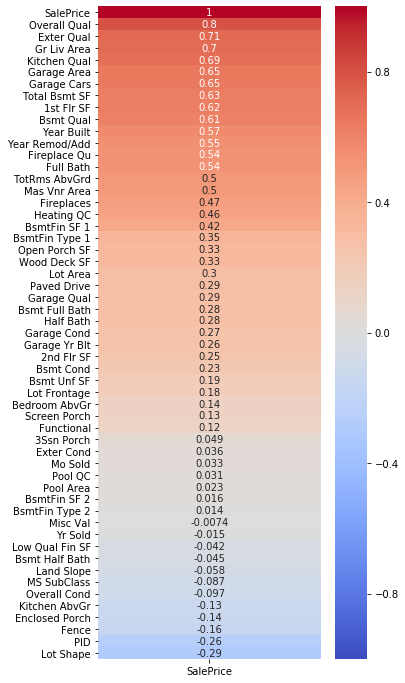

In [107]:
plt.figure(figsize = (5, 12))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False), 
            vmin = -1, 
            vmax = 1, 
            cmap = 'coolwarm', 
            annot = True);

_Chart 1:_
Heatmap to show correlation between Sale Price and other variables from the train dataset. 

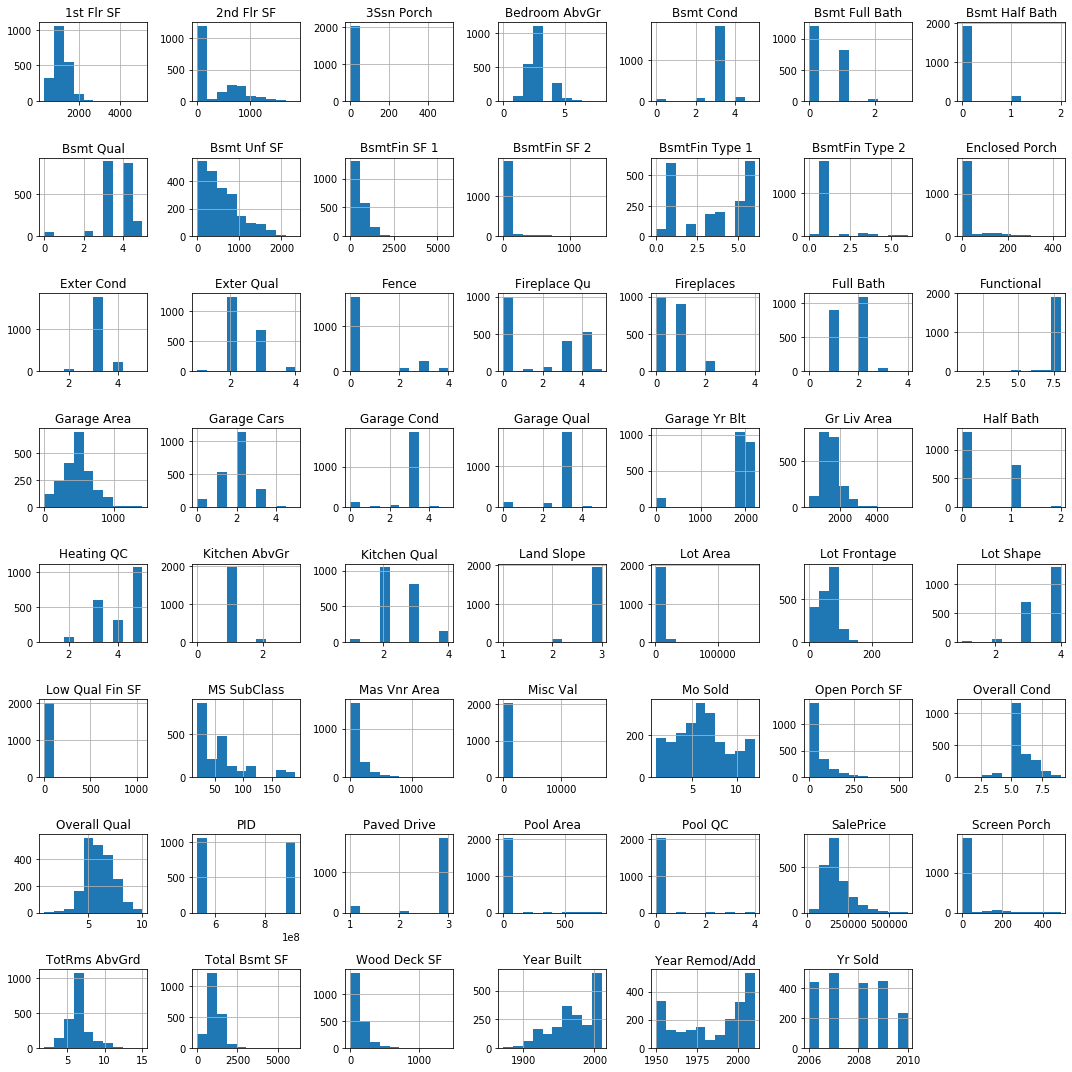

In [108]:
train.hist(figsize=(15, 15))
plt.tight_layout();

- Histograms showing the relationship between all variables in train dataset and sale price. Closer analysis is done with scatterplots and boxplots below for normal and skewed distributions.

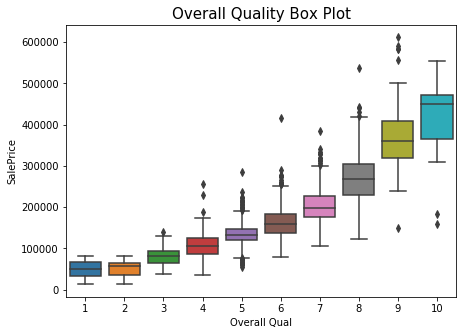

In [109]:
plt.figure(figsize = (7,5))
plt.title('Overall Quality Box Plot', fontsize = 15)
sns.boxplot(train['Overall Qual'], train['SalePrice']);

_Chart 2:_ 
The higher the overall quality (overall material and finish of the house), the higher the price range.

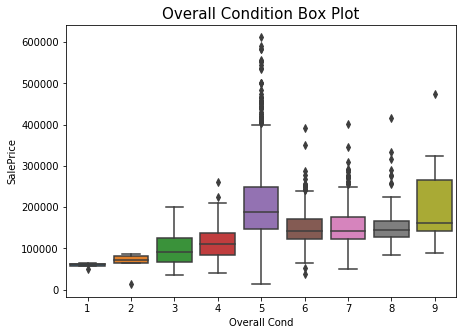

In [110]:
plt.figure(figsize = (7,5))
plt.title('Overall Condition Box Plot', fontsize = 15)
sns.boxplot(train['Overall Cond'], train['SalePrice']);

_Chart 3:_ 
There isn't a strong spread in sale price based on the overall condition of the house as the higher the rating is, the median across all ranks falls roughly within the same range. 

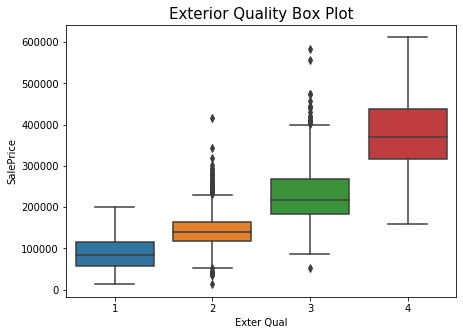

In [111]:
plt.figure(figsize = (7,5))
plt.title('Exterior Quality Box Plot', fontsize = 15)
sns.boxplot(train['Exter Qual'], train['SalePrice']);

_Chart 4:_ 
The higher the exterior quality (exterior material quality of the house), the higher the price range, which shows that there is somewhat of an effect on price based on the rating of the exterior quality. 

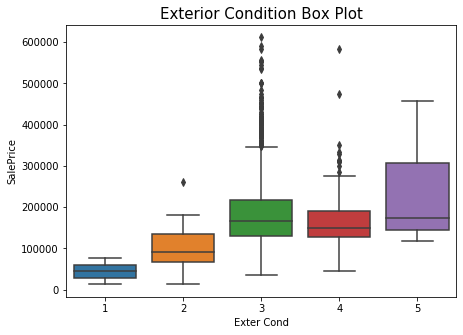

In [112]:
plt.figure(figsize = (7,5))
plt.title('Exterior Condition Box Plot', fontsize = 15)
sns.boxplot(train['Exter Cond'], train['SalePrice']);

_Chart 5:_ 
There isn't a strong spread in sale price based on the exterior condition of the house, similar to overall condition, as the higher the rating is, the median across all ranks falls roughly within the same range. 

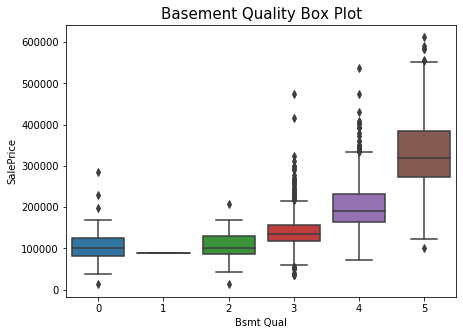

In [113]:
plt.figure(figsize = (7,5))
plt.title('Basement Quality Box Plot', fontsize = 15)
sns.boxplot(train['Bsmt Qual'], train['SalePrice']);

_Chart 6:_ 
There is a slight increase in sale price as the basement quality increases; however, there is a general equal price range for the lower qualities. 

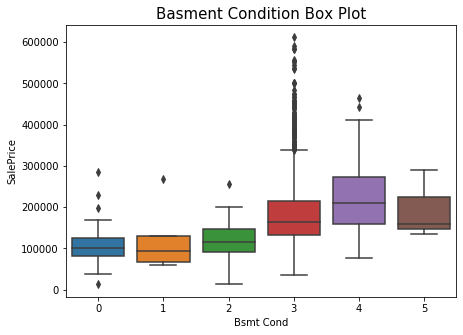

In [114]:
plt.figure(figsize = (7,5))
plt.title('Basment Condition Box Plot', fontsize = 15)
sns.boxplot(train['Bsmt Cond'], train['SalePrice']);

_Chart 7:_ 
There isn't a strong spread in sale price based on the basement condition of the house, similar to the other conditions, as the higher the rating is, the median across all ranks falls roughly within the same range. 

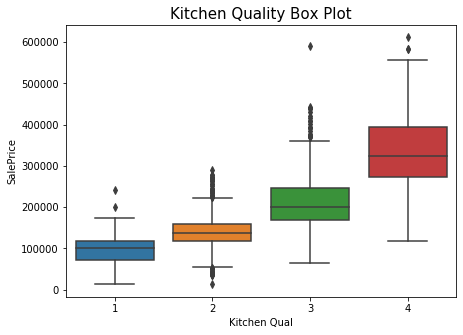

In [115]:
plt.figure(figsize = (7,5))
plt.title('Kitchen Quality Box Plot', fontsize = 15)
sns.boxplot(train['Kitchen Qual'], train['SalePrice']);

_Chart 8:_ 
There is a slight increase in sale price as the kitchen quality increases.

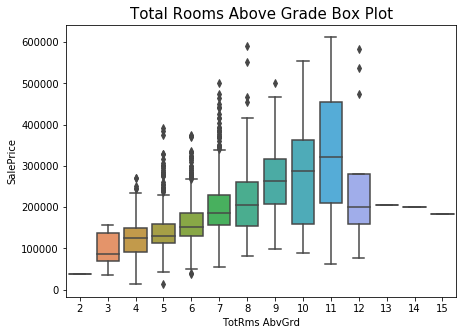

In [116]:
plt.figure(figsize = (7,5))
plt.title('Total Rooms Above Grade Box Plot', fontsize = 15)
sns.boxplot(train['TotRms AbvGrd'], train['SalePrice']);

_Chart 9:_ 
There is a slight increase in sale price as the total rooms above grade increases; however, there is a peark that is reached as shown by 11 rooms, where suddently there is a drop in the mean and IQR in 12+ rooms. 

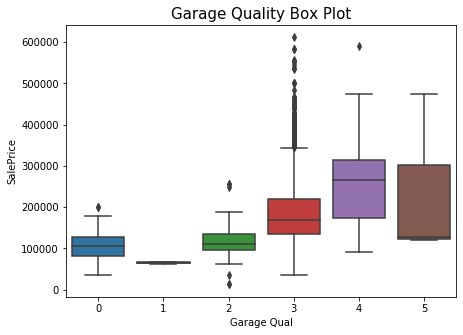

In [117]:
plt.figure(figsize = (7,5))
plt.title('Garage Quality Box Plot', fontsize = 15)
sns.boxplot(train['Garage Qual'], train['SalePrice']);

_Chart 10:_ 
There is a slight increase in sale price as the garage quality increases; however, does seem to be a sudden change in the highest quality as the mean sale price drops significantly compared to rankings of 3 and 4.

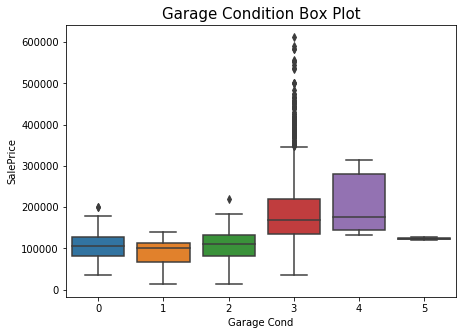

In [118]:
plt.figure(figsize = (7,5))
plt.title('Garage Condition Box Plot', fontsize = 15)
sns.boxplot(train['Garage Cond'], train['SalePrice']);

_Chart 11:_ 
There isn't a strong spread in sale price based on the garage condition of the house, similar to the other conditions, as the higher the rating is, the median across all ranks falls roughly within the same range. 

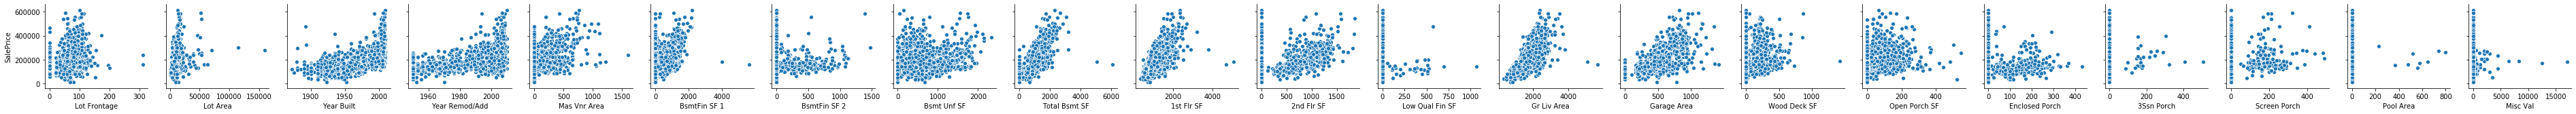

In [119]:
sns.pairplot(train, 
             x_vars = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
                       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF','1st Flr SF',
                       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area',
                       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
                       'Screen Porch', 'Pool Area', 'Misc Val'], 
             y_vars = ['SalePrice']);

- Group scatter plots showing the relationship between continuous variables and sale price. Further analysis is done with standout graphs with a linear regression line below. 

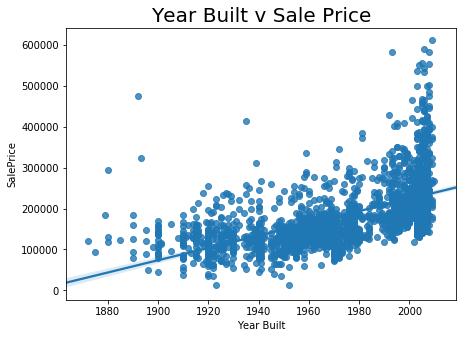

In [120]:
plt.figure(figsize = (7,5))
plt.title('Year Built v Sale Price', fontsize = 20)
sns.regplot(train['Year Built'], train['SalePrice'])

_Chart 12:_ 
The correlation between when a house was built against sale price is shown above, where a sudden increase in price is seen in more recently built houses while in earlier houses, there is a strong positive correlation with a few outliers. 

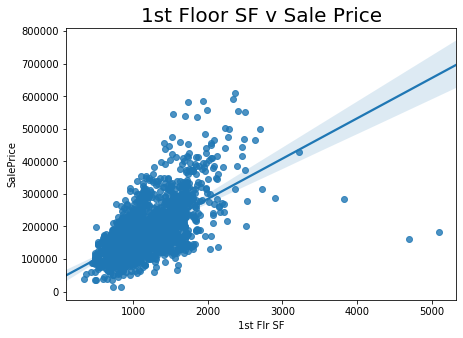

In [121]:
plt.figure(figsize = (7,5))
plt.title('1st Floor SF v Sale Price', fontsize = 20)
sns.regplot(train['1st Flr SF'], train['SalePrice'])

_Chart 13:_ 
The correlation between total square footage on the 1st floor of a house against sale price is shown above, where there is a heavy concentration in the bottom left part of the graph showing that prices generally fell in the same range for the same amount of square footage, but it also shows that there aren't many houses that had more than about 2000 square feet on the first floor. 

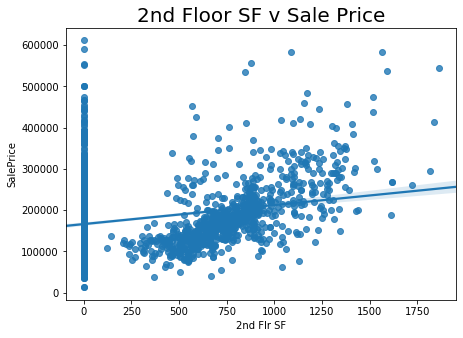

In [122]:
plt.figure(figsize = (7,5))
plt.title('2nd Floor SF v Sale Price', fontsize = 20)
sns.regplot(train['2nd Flr SF'], train['SalePrice']);

_Chart 14:_ 
The correlation between total square footage on the 2nd floor of a house against sale price is shown above, where there does seem to be a moderately strong positive correlation while ignoring the houses that did not have a second floor. There does seem to be another aspect that may affect why some of the prices jump more than others. 

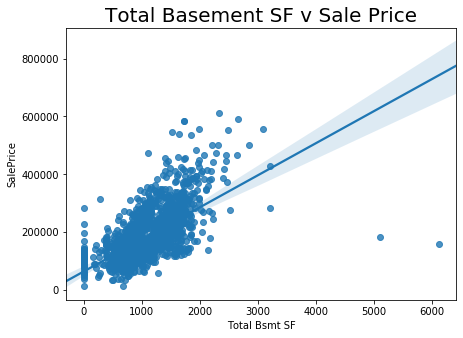

In [123]:
plt.figure(figsize = (7,5))
plt.title('Total Basement SF v Sale Price', fontsize = 20)
sns.regplot(train['Total Bsmt SF'], train['SalePrice']);

_Chart 15:_ 
The correlation between total square footage of the basement of a house against sale price is shown above, where there is a heavy concentration in the bottom left part of the graph showing that prices generally fell in the same range for the same amount of square footage, but it also shows that there aren't many houses that had more than about 2000 square feet for the basement, similarly to the 1st floor square footage relationship. 

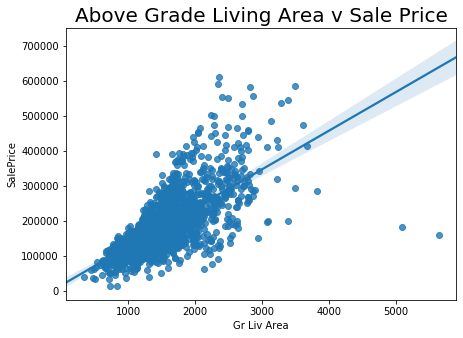

In [124]:
plt.figure(figsize = (7,5))
plt.title('Above Grade Living Area v Sale Price', fontsize = 20)
sns.regplot(train['Gr Liv Area'], train['SalePrice']);

_Chart 16:_
The correlation between above grade living area of a house against sale price is shown above, where there is a relatively strong positive correlation. 

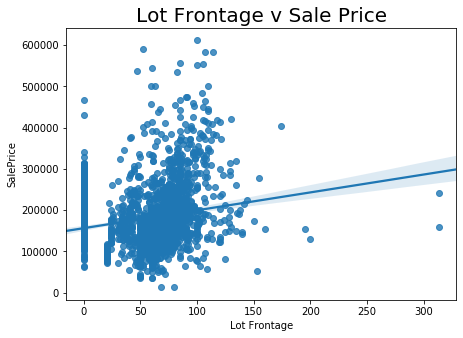

In [125]:
plt.figure(figsize = (7,5))
plt.title('Lot Frontage v Sale Price', fontsize = 20)
sns.regplot(train['Lot Frontage'], train['SalePrice']);

_Chart 17:_
The correlation between lot frontage against sale price is shown above, where there is a concentration in the number of feet where the street is connected to the property with some minor outliers. There is a lot of variance, so other factors of the house may have contributed to the higher prices for houses with similar lot frontages. 

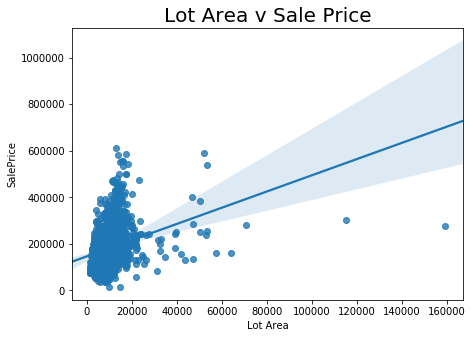

In [126]:
plt.figure(figsize = (7,5))
plt.title('Lot Area v Sale Price', fontsize = 20)
sns.regplot(train['Lot Area'], train['SalePrice']);

_Chart 18:_The correlation between lot area against sale price is shown above, where there is a high concentration in the bottom left part of the graph which entails that lot area doesn't have a significant affect on price. All houses generally had the same price range; however, it is spread across a range of about 500,000, but we can see that houses that had higher lot areas, still feel around the same sale price.

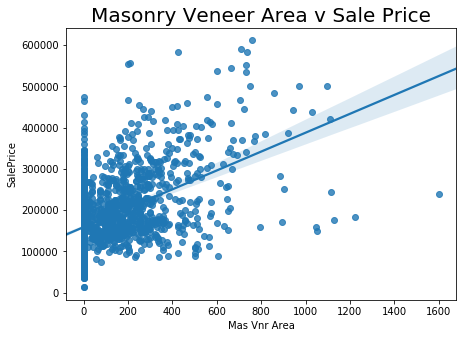

In [127]:
plt.figure(figsize = (7,5))
plt.title('Masonry Veneer Area v Sale Price', fontsize = 20)
sns.regplot(train['Mas Vnr Area'], train['SalePrice']);

_Chart 19:_
The correlation between masonry veneer area against sale price is shown above, where there is a noticeable concentration on teh left, but the variance is quite high which entails that the veneer area doesn't have a significant impact on sale price compared to other factors especially given the number of houses that have an area of 0, which tells that the house didn't even have a masonry.

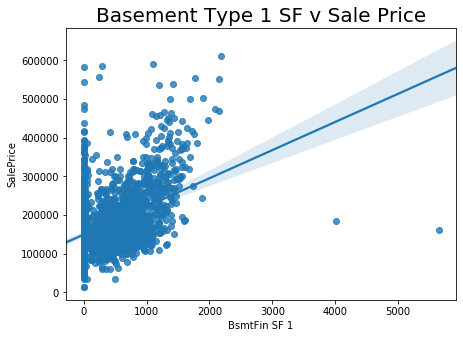

In [128]:
plt.figure(figsize = (7,5))
plt.title('Basement Type 1 SF v Sale Price', fontsize = 20)
sns.regplot(train['BsmtFin SF 1'], train['SalePrice']);

_Chart 20:_
The correlation between single type finished basement area against sale price is shown above, where there is a high concentration with high variance. There is a large number of houses that either may not have a basement or have a finished single type basement. However, the variance and outliers can show that this factor doesn't significantly impact price. 

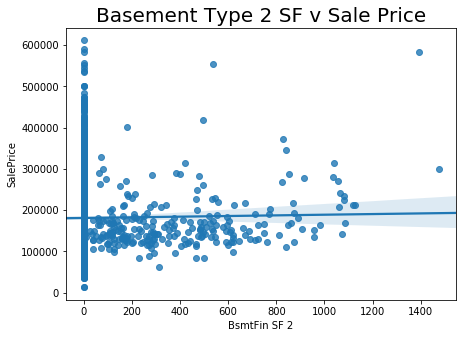

In [129]:
plt.figure(figsize = (7,5))
plt.title('Basement Type 2 SF v Sale Price', fontsize = 20)
sns.regplot(train['BsmtFin SF 2'], train['SalePrice']);

_Chart 21:_
The correlation between multi-type finished basement area against sale price is shown above, there is a variety of areas, however the price range is generally the same, so the size of the basement doesn't seem to yield a high impact on sale price. 

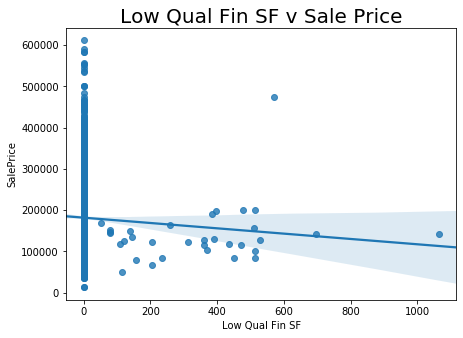

In [130]:
plt.figure(figsize = (7,5))
plt.title('Low Qual Fin SF v Sale Price', fontsize = 20)
sns.regplot(train['Low Qual Fin SF'], train['SalePrice']);

_Chart 22:_
The correlation between low quality finished floors against sale price is shown above, where we can see that not a lot of houses had the floors finished (or redone) and the houses that did, there seems to be a negative correlation, so have a low quality floor finish seems to lower sale price, but there isn't any significant correlation between the two. 

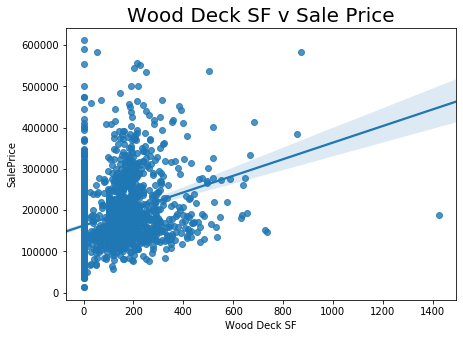

In [131]:
plt.figure(figsize = (7,5))
plt.title('Wood Deck SF v Sale Price', fontsize = 20)
sns.regplot(train['Wood Deck SF'], train['SalePrice']);

_Chart 23:_
The correlation between wood desk area in square feet against sale price is shown above, where there is a high concentration in the bottom left, as well as variance, but given the concentration of most of the houses, it can be inferred that wood deck doesn't have a strong impact on sale price as other factors may explain the higher prices for similar wood deck areas. 

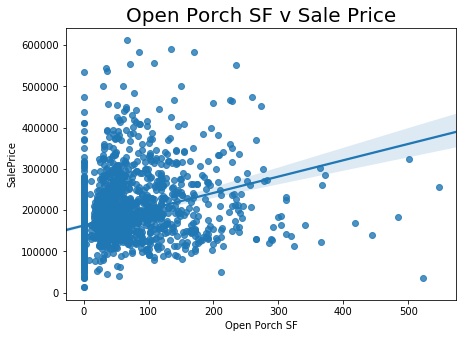

In [132]:
plt.figure(figsize = (7,5))
plt.title('Open Porch SF v Sale Price', fontsize = 20)
sns.regplot(train['Open Porch SF'], train['SalePrice']);

_Chart 24:_ 
The correlation between open porch square footage against sale price is shown above, where there does seem to be a slight linear increase in the data points showing a positive correlation; however, sale price tends to fall within a similar range despite a house having five times more square footage than another. 

### Visualization Notes
- Overall thoughts based on the visualizations, categories regarding house quality have a higher impact on sale price than categories regarding house condition. 
- The year built and sale price relationship tends to have more of an exponential relationship due to the more wide spread prices in newer houses. 
- The total square footage for the 1st floor and basement of houses seems to be relatively in the same area across houses; however, there is more variance for houses that have a 2nd floor and the affect the square footage has on price. 

### Dropping Outliers 
Here I dropped outliers based on the scatter plots from above to decrease the amount of variance from stand out plots. 

In [133]:
saleprice_outliers = train[train['SalePrice'] > 500_000].index
train.drop(saleprice_outliers, inplace = True)

In [134]:
first_fl_sf_outliers = train[train['1st Flr SF'] > 5_000].index
train.drop(first_fl_sf_outliers, inplace = True)

In [135]:
first_fl_sf_outliers = train[train['2nd Flr SF'] > 1500].index
train.drop(first_fl_sf_outliers, inplace = True)

In [136]:
first_fl_sf_outliers = train[train['Total Bsmt SF'] > 4_000].index
train.drop(first_fl_sf_outliers, inplace = True)

In [137]:
grd_liv_outliers = train[train['Gr Liv Area'] > 3500].index
train.drop(grd_liv_outliers, inplace = True)

In [138]:
lot_front_outliers = train[train['Lot Frontage'] > 250].index
train.drop(lot_front_outliers, inplace = True)

In [139]:
lot_area_outliers = train[train['Lot Area'] > 100_00].index
train.drop(lot_area_outliers, inplace = True)

In [140]:
mas_vnr_outliers = train[train['Mas Vnr Area'] > 1400].index
train.drop(mas_vnr_outliers, inplace = True)

In [141]:
bsmtfin1_outliers = train[train['BsmtFin SF 1'] > 3000].index
train.drop(bsmtfin1_outliers, inplace = True)

In [142]:
bsmtfin2_outliers = train[train['BsmtFin SF 2'] > 1400].index
train.drop(bsmtfin2_outliers, inplace = True)

In [143]:
low_qualfin_outliers = train[train['Low Qual Fin SF'] > 800].index
train.drop(low_qualfin_outliers, inplace = True)

In [144]:
wood_deck_outliers = train[train['Wood Deck SF'] > 1200].index
train.drop(wood_deck_outliers, inplace = True)

In [145]:
open_porch_outliers = train[train['Open Porch SF'] > 500].index
train.drop(open_porch_outliers, inplace = True)

## Converting Categorical Data 

Note: Based on the data description, I dummied all the columns that had categorical data so yield numerical (binary) data. 
___

In [146]:
train = pd.get_dummies(data = train, columns = ['MS Zoning'])
test = pd.get_dummies(data = test, columns = ['MS Zoning'])

In [147]:
train = pd.get_dummies(data = train, columns = ['Street'])
test = pd.get_dummies(data = test, columns = ['Street'])

In [148]:
train = pd.get_dummies(data = train, columns = ['Alley'])
test = pd.get_dummies(data = test, columns = ['Alley'])

In [149]:
train = pd.get_dummies(data = train, columns = ['Land Contour'])
test = pd.get_dummies(data = test, columns = ['Land Contour'])

In [150]:
train = pd.get_dummies(data = train, columns = ['Utilities'])
test = pd.get_dummies(data = test, columns = ['Utilities'])

In [151]:
train = pd.get_dummies(data = train, columns = ['Lot Config'])
test = pd.get_dummies(data = test, columns = ['Lot Config'])

In [152]:
train = pd.get_dummies(data = train, columns = ['Neighborhood'])
test = pd.get_dummies(data = test, columns = ['Neighborhood'])

In [153]:
train = pd.get_dummies(data = train, columns = ['Condition 1'])
test = pd.get_dummies(data = test, columns = ['Condition 1'])

In [154]:
train = pd.get_dummies(data = train, columns = ['Condition 2'])
test = pd.get_dummies(data = test, columns = ['Condition 2'])

In [155]:
train = pd.get_dummies(data = train, columns = ['Bldg Type'])
test = pd.get_dummies(data = test, columns = ['Bldg Type'])

In [156]:
train = pd.get_dummies(data = train, columns = ['House Style'])
test = pd.get_dummies(data = test, columns = ['House Style'])

In [157]:
train = pd.get_dummies(data = train, columns = ['Roof Style'])
test = pd.get_dummies(data = test, columns = ['Roof Style'])

In [158]:
train = pd.get_dummies(data = train, columns = ['Roof Matl'])
test = pd.get_dummies(data = test, columns = ['Roof Matl'])

In [159]:
train = pd.get_dummies(data = train, columns = ['Exterior 1st'])
test = pd.get_dummies(data = test, columns = ['Exterior 1st'])

In [160]:
train = pd.get_dummies(data = train, columns = ['Exterior 2nd'])
test = pd.get_dummies(data = test, columns = ['Exterior 2nd'])

In [161]:
train = pd.get_dummies(data = train, columns = ['Mas Vnr Type'])
test = pd.get_dummies(data = test, columns = ['Mas Vnr Type'])

In [162]:
train = pd.get_dummies(data = train, columns = ['Foundation'])
test = pd.get_dummies(data = test, columns = ['Foundation'])

In [163]:
train = pd.get_dummies(data = train, columns = ['Heating'])
test = pd.get_dummies(data = test, columns = ['Heating'])

In [164]:
train = pd.get_dummies(data = train, columns = ['Central Air'])
test = pd.get_dummies(data = test, columns = ['Central Air'])

In [165]:
train = pd.get_dummies(data = train, columns = ['Garage Type'])
test = pd.get_dummies(data = test, columns = ['Garage Type'])

In [166]:
train = pd.get_dummies(data = train, columns = ['Misc Feature'])
test = pd.get_dummies(data = test, columns = ['Misc Feature'])

In [167]:
train = pd.get_dummies(data = train, columns = ['Sale Type'])
test = pd.get_dummies(data = test, columns = ['Sale Type'])

In [168]:
train.shape

(1195, 205)

In [169]:
test.shape

(878, 210)

- The train and test dataframes have a greater difference in columns now due to the dummy column process. Since there are less rows in the test dataframe than the train dataframe, there could have been values in some columns that only appeared in the train dataframe. 

## Preprocessing and Modeling

In [170]:
# Determine any nonsimilar dummy columns
test_missing_cols = set(train) - set(test)

In [171]:
train_missing_cols = set(test) - set(train)

In [172]:
# To reconcile missing columns before fitting data
for col in train_missing_cols:
    train[col] = 0

In [173]:
for col in test_missing_cols:
    test[col] = 0

In [174]:
# Check to see if columns are equal
test.shape

(878, 220)

In [175]:
train.shape

(1195, 220)

In [176]:
# Exclude any data types that are an object column
train = train.select_dtypes(exclude = ['object'])
test = test.select_dtypes(exclude = ['object'])

# Model : 

### Adjusted Linear Regression

In [177]:
# Adjust features
features = ['Overall Qual', 'Exter Qual', 'Total Bsmt SF', 'Gr Liv Area', '1st Flr SF', 
            'Year Built', 'Mas Vnr Area', 'BsmtFin SF 1', 'Open Porch SF', 'Wood Deck SF']

X = train[features]
y = train['SalePrice']

In [178]:
# Split adjusted data features
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [179]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_preds = lr.predict(X_train)
y_test_preds = lr.predict(X_test)

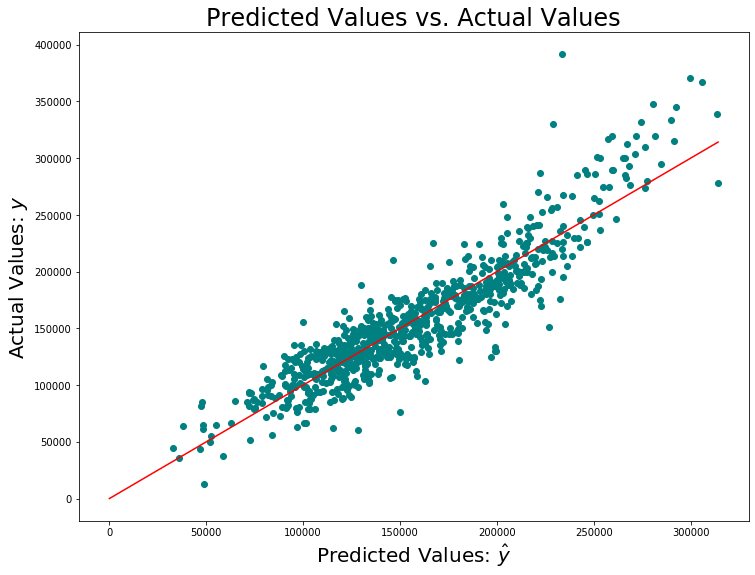

In [180]:
# Replot the model
plt.figure(figsize=(12,9))
plt.scatter(y_train_preds, y_train, color = 'teal')

plt.plot([0, np.max(y_train_preds)],
         [0, np.max(y_train_preds)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

# Model : 

### Linear Regression Comparison Notes

With the base linear regression model, where I factored in all column variables to predict sale price, it did quite well where as shown in the graph there is minimal variance. However, considering the more "heavy-weight" factors from my EDA, I decided to adjust my model as there may be future houses that may not have variables that my trained model has. 

So in my adjusted linear regression model, I factored in Overall Quality, Exterior Quality, Total Basement Square Footage, Above Grade Living Area, 1st Floor Square Footage, Year Built, Total Rooms Above Grade, Masonry Veneer Area, Type 1 Finished Basement Square Footage, Open Porch Square Footage, and Wood Deck Square Footage, which based on my Heatmap showed high correlations to sale price.

- Overall, these factors are subjective and more general to cater to more houses that may not have factors such as a Garage or a Pool. 
- The adjusted model also went through multiple iterations before coming to the final model based on above features.

## Regularization

Here we fit the data to a different model to determine which model is best for predicting sale price based on the established features from the Linear Regression model. 

- We scale the data, then instantiate and fit our data to the Lasso and Ridge Linear Models

### Scaling Data

In [181]:
# Train-test split the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [182]:
#Instantiate the model 
ss = StandardScaler()

In [183]:
# Fit the model 
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [184]:
# Scale
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

### Lasso Regression 

In [185]:
# Instantiate the model 
lasso = LassoCV()

In [186]:
# Fit the model 
lasso.fit(X_train_sc, y_train);

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [187]:
# Predict y-values 
y_train_preds2 = lasso.predict(X_train_sc)
y_test_preds2 = lasso.predict(X_test_sc)

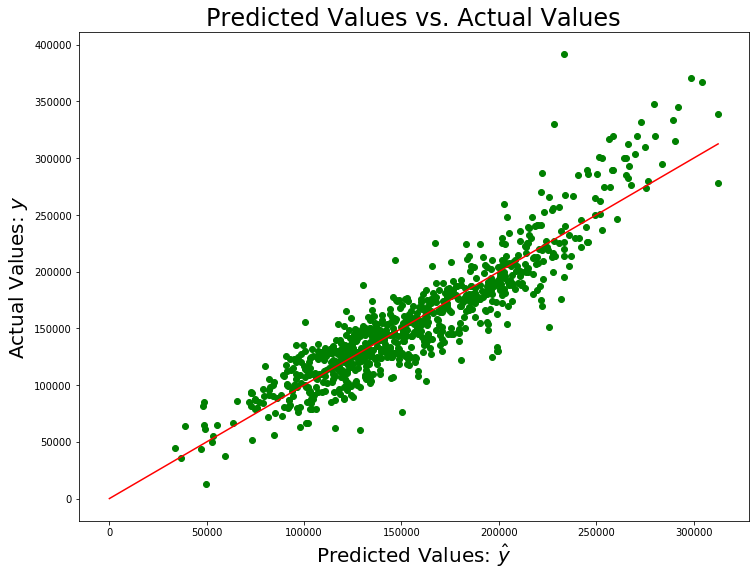

In [188]:
# Plot 
plt.figure(figsize=(12,9))
plt.scatter(y_train_preds2, y_train, color = 'green')

plt.plot([0, np.max(y_train_preds2)],
         [0, np.max(y_train_preds2)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

# Model : 

### Ridge Regression 

In [189]:
# Instantiate the model 
ridge = RidgeCV()

In [190]:
# Fit the model 
ridge.fit(X_train_sc, y_train);

In [191]:
# Predict y-values
y_train_preds3 = ridge.predict(X_train_sc)
y_test_preds3 = ridge.predict(X_test_sc)

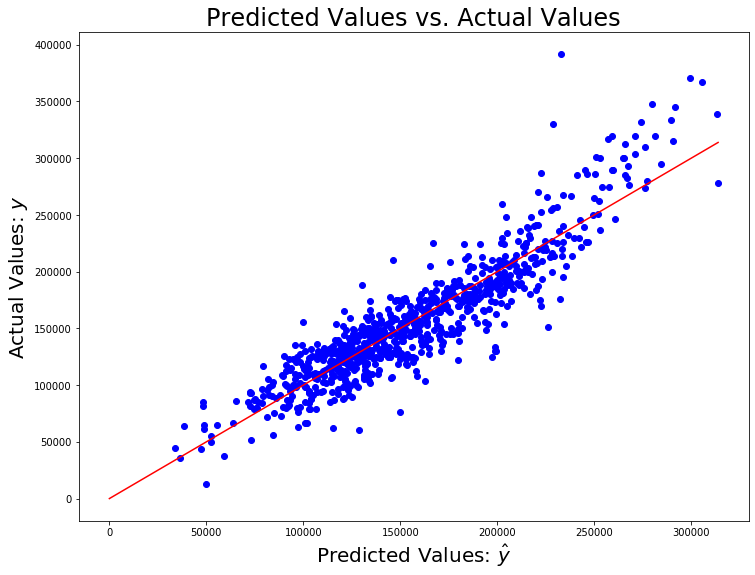

In [192]:
# Plot 
plt.figure(figsize=(12,9))
plt.scatter(y_train_preds3, y_train, color = 'blue')

plt.plot([0, np.max(y_train_preds3)],
         [0, np.max(y_train_preds3)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

# Model: 

## Model Scoring

In [193]:
# Baseline scoring
y_bar = np.mean(y)
y_preds_baseline = [y_bar for i in y]
r2_score(y, y_preds_baseline)

0.0

# Explain 

### Linear Regression Scoring

In [194]:
# Train scoring 
lr.score(X_train, y_train)

0.8345197824362003

In [195]:
# Test scoring
lr.score(X_test, y_test)

0.8250732919655174

In [196]:
# Cross val scoring
cross_val_score(lr, X_train, y_train, cv = 5).mean()

0.8257843991199296

Linear Regression Score Comparison: The model does quite well with the training dataset and significantly better than the baseline model. The training dataset yields an $R^2$ of 0.8345, which means that 83.45% of the variance can be explained by the model. Similarly, the testing dataset yields an $R^2$ of 0.8251, which means that 82.51% of the variance can be explained by the same model. Although the $R^2$ is lower for the testing dataset than the training dataset, this does entail slight bias, but the model still does very well when exposed to new data. 

In [197]:
# Scoring based on Mean Squared Error metric: 
def MSE(true_values, predicted_values): 
    mean_se = np.mean((true_values - predicted_values) ** 2)
    return mean_se

In [198]:
# Baseline 
MSE(y, y_preds_baseline)

2987992904.248179

In [199]:
# Train dataset
MSE(y_train, y_train_preds)

482763133.15345246

In [200]:
# Test dataset
MSE(y_test, y_test_preds)

551231033.6772127

Mean Squared Error Metric Score Comparison: Similarly to the $R^2$ metric, the model does quite well with the training dataset and significantly better than the baseline model. The baseline yields a MSE of approximately 3 billion dollars. The training dataset yields a MSE of approximately 4.8 million dollars, which signifies the average of all differences between the predicted and true sale prices. Similarly, the testing dataset yields a MSE of approximately 5.5 million dollars, which that the model still does fairly well with predicting sale prices for new data, but there is slightly a higher variance. Although the MSE is higher for the testing dataset than the training dataset, the model still does pretty well when exposed to new data especially compared to the baseline. 

### Lasso Regression Scoring

In [201]:
# Train scoring 
lasso.score(X_train_sc, y_train)

0.8344585800249872

In [202]:
# Test scoring 
lasso.score(X_test_sc, y_test)

0.8247500181555528

In [203]:
# Cross val scoring
cross_val_score(lasso, X_train_sc, y_train, cv = 5).mean()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warn

0.8247503280628962

Lasso Regression Score Comparison: The model does quite well with the training dataset and significantly better than the baseline model. The training dataset yields an $R^2$ of 0.8345, which means that 83.45% of the variance can be explained by the model. Similarly, the testing dataset yields an $R^2$ of 0.8248, which means that 82.46% of the variance can be explained by the same model. Although the $R^2$ is lower for the testing dataset than the training dataset, this does entail slight bias, but the model still does very well when exposed to new data. 

Compared to the Linear Regression Scores, the Lasso Regression Scores are slightly higher so they account for minutely more variance. However, both scores yield highly similar scores. 

### Ridge Regression Scoring

In [204]:
# Train scoring 
ridge.score(X_train_sc, y_train)

0.8344951050576472

In [205]:
# Test scoring 
ridge.score(X_test_sc, y_test)

0.8249830740179351

In [206]:
# Cross val scoring 
cross_val_score(ridge, X_train_sc, y_train, cv = 5).mean()

0.8259696291972668

Ridge Regression Score Comparison: The model does quite well with the training dataset and significantly better than the baseline model. The training dataset yields an $R^2$ of 0.8345, which means that 83.45% of the variance can be explained by the model. Similarly, the testing dataset yields an $R^2$ of 0.825, which means that 82.5% of the variance can be explained by the same model. Although the $R^2$ is lower for the testing dataset than the training dataset, this does entail slight bias, but the model still does very well when exposed to new data. 

Compared to the Linear Regression Scores, Ridge Regression Scores does almost identical when looking at the train and test scores. However, when looking at the cross validation scores, we can see that the Ridge score is slightly higher. 

|Model|Cross Val Score|
|---|---|
|Linear Regression|0.82578|
|Ridge Regression|0.82597|

This could be due to the fact that the train-test-split may have pulled a "bad" sample divison where the cross validation score takes the mean of five folds. 

## Conclusion

In [207]:
#Instantiate and fit 
model = sm.OLS(y_train, X_train).fit()

In [208]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              4001.
Date:                Tue, 14 Jan 2020   Prob (F-statistic):                        0.00
Time:                        17:34:07   Log-Likelihood:                         -9599.5
No. Observations:                 836   AIC:                                  1.922e+04
Df Residuals:                     826   BIC:                                  1.927e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Overall Qual   1.399e+04    997.616     14.022      0.000     1.2e+04    1.59e+04
Exter Qual     2.694e+04   2141.187     12.581      0.000    2.27e+04    3.11e+04
Total Bsmt SF    13.9897      4.075      3.433      0.001       5.991      21.989
Gr Liv Area      39.3890      2.720     14.479      0.000      34.049      44.729
1st Flr SF       13.3283      4.569      2.917      0.004       4.359      22.297
Year Built      -42.5617      2.467    -17.256      0.000     -47.403     -37.720
Mas Vnr Area     18.1389      6.548      2.770      0.006       5.287      30.991
BsmtFin SF 1     27.2526      2.473     11.022      0.000      22.399      32.106
Open Porch SF    52.4259     15.376      3.410      0.001      22.245      82.607
Wood Deck SF     20.1916      7.746      2.607      0.009       4.987      35.396
==============================================================================
Omnibus:                       80.394   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.075
Skew:                           0.272   Prob(JB):                     7.28e-86
Kurtosis:                       6.310   Cond. No.                     7.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After modeling with our training data, we see that Ridge Regression performs the best amongst all three types of models as seen by the cross validation score of 0.82597 which tells us that this model accounts for 82.597% variance in y is explained by X relative to ȳ.

In [209]:
pd.Series(ridge.coef_, index = features)

Overall Qual     14723.584316
Exter Qual       10329.699876
Total Bsmt SF     4709.443460
Gr Liv Area      16399.394409
1st Flr SF        3687.650724
Year Built        9952.118528
Mas Vnr Area      1131.220508
BsmtFin SF 1      9115.471399
Open Porch SF     1820.274502
Wood Deck SF      1418.596875
dtype: float64

Here we have the coefficients for our features based on the Ridge Regression Model, which represents the slope of the model. We can interpret these numbers as follows: 

|Feature|Meaning|
|---|---|
|Overall Qual|For all else held equal, a one unit increase in overall quality yields a 14,723 increase in Sale Price|
|Exter Qual|For all else held equal, a one unit increase in exterior quality yields a 10,329 increase in Sale Price|
|Total Bsmt SF|For all else held equal, a one unit increase in total basement square footage yields a 4,709 increase in Sale Price| 
|Gr Liv Area|For all else held equal, a one unit increase in above grade living area yields a 16,399 increase in Sale Price| 
|1st Flr SF|For all else held equal, a one unit increase in 1st floor square footage yields a 3,687 increase in Sale Price| 
|Year Built|For all else held equal, a one unit increase in the year build yields a 9,952 increase in Sale Price| 
|Mas Vnr Area|For all else held equal, a one unit increase in masonry veneer area yields a 1,131 increase in Sale Price| 
|BsmtFin SF 1|For all else held equal, a one unit increase in type 1 finished basement sqaure footage yields a 9,115 increase in Sale Price| 
|Open Porch SF|For all else held equal, a one unit increase in open porch square footage yields a 1,820 increase in Sale Price| 
|Wood Deck SF|For all else held equal, a one unit increase in wood deck sqaure footage yields a 1,418 increase in Sale Price| 

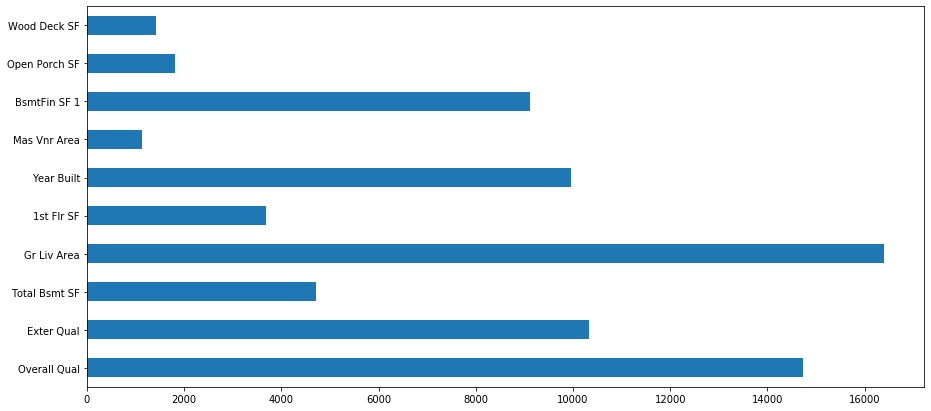

In [210]:
pd.Series(ridge.coef_, index = features).plot.barh(figsize=(15, 7));

### Kaggle Predictions

In [211]:
test.shape

(878, 214)

In [212]:
train.shape

(1195, 217)

In [213]:
X_kaggle = test[features]

In [214]:
ss.fit(X_kaggle)
X_kaggle_sc = ss.transform(X_kaggle)

In [215]:
preds_kaggle = ridge.predict(X_kaggle_sc)

In [216]:
X_kaggle['SalePrice'] = preds_kaggle

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [217]:
X_kaggle.head()

Overall Qual  Exter Qual  Total Bsmt SF  Gr Liv Area  1st Flr SF  \
Id                                                                       
2658             6           2           1020         1928         908   
2718             5           2           1967         1967        1967   
2414             7           3            654         1496         664   
1989             5           3            968          968         968   
625              6           2           1394         1394        1394   

      Year Built  Mas Vnr Area  BsmtFin SF 1  Open Porch SF  Wood Deck SF  \
Id                                                                          
2658        1910           0.0             0             60             0   
2718        1977           0.0             0              0           170   
2414        2006           0.0           554             24           100   
1989        1923           0.0             0              0             0   
625         1963         247.0           609             76             0   

          SalePrice  
Id                   
2658  129507.102801  
2718  163553.547065  
2414  181352.156860  
1989  108764.766963  
625   153200.467257

In [218]:
predictions = X_kaggle[['SalePrice']]

In [219]:
# predictions.to_csv('../datasets/sixth_submission.csv')